In [40]:
import numpy as np
import random
from collections import defaultdict
import csv
from sklearn.metrics import adjusted_rand_score
# from unk_greedy import find_partition
from spectral_community_detection import spectral_community_detection
import networkx as nx


import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def create_reduced_graph(original_graph, partition):
    # Initialize the reduced graph
    reduced_graph = nx.Graph()
    partition_d = defaultdict(list)
    for ix, val in enumerate(partition):
        partition_d[val].append(ix)
    
    # Step 1: Create nodes for each community in the partition
    community_nodes = {}
    for community_id, community_nodes_list in partition_d.items():
        community_nodes[community_id] = f"Community_{community_id}"
        reduced_graph.add_node(community_nodes[community_id])
    
    # Step 2: Count inter-community edges and add them to the reduced graph
    inter_community_edges = defaultdict(int)
    for u, v in original_graph.edges():
        # Find the communities for nodes u and v
        community_u = None
        community_v = None
        for community_id, community_nodes_list in partition_d.items():
            if u in community_nodes_list:
                community_u = community_id
            if v in community_nodes_list:
                community_v = community_id
        
        if(community_u == None or community_v == None):
            community_v= community_u
        # If u and v belong to different communities, count the edge
        if community_u != community_v:
            inter_community_edges[(community_u, community_v)] += 1

    # Add edges between communities in the reduced graph based on inter-community edges
    for (community_u, community_v), weight in inter_community_edges.items():
        if community_u != community_v:
            reduced_graph.add_edge(community_nodes[community_u], community_nodes[community_v], weight=weight)

    # Step 3: Optionally add self-loops for intra-community edges (edges within the same community)
    for community_id, community_nodes_list in partition_d.items():
        # Intra-community edges
        intra_edges_count = 0
        for i in range(len(community_nodes_list)):
            for j in range(i + 1, len(community_nodes_list)):
                if original_graph.has_edge(community_nodes_list[i], community_nodes_list[j]):
                    intra_edges_count += 1
        if intra_edges_count > 0:
            reduced_graph.add_edge(community_nodes[community_id], community_nodes[community_id], weight=intra_edges_count)

    return reduced_graph, inter_community_edges, community_nodes

# Example usage:
def draw_reduced(g, partition,name = None):

    # Generate the reduced graph
    reduced_G, inter_community_edges, community_nodes = create_reduced_graph(g, partition)
    
    # Calculate the number of inter-community connections for each community
    community_connections = {node: 0 for node in reduced_G.nodes()}
    for (community_u, community_v), weight in inter_community_edges.items():
        community_connections[community_nodes[community_u]] += weight
        community_connections[community_nodes[community_v]] += weight
    
    # Draw the reduced graph with the number of inter-community connections as node labels
    pos = nx.circular_layout(reduced_G)  # Position nodes using spring layout
    plt.figure(figsize=(8, 6))
    
    # Draw nodes and edges
    nx.draw(reduced_G, pos, node_color='skyblue')

    # Draw node labels (number of inter-community connections for each community)
    # nx.draw_networkx_labels(reduced_G, pos)

    # Draw edge weights (show the number of inter-community connections between communities)
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in reduced_G.edges(data=True)}
    nx.draw_networkx_edge_labels(reduced_G, pos, edge_labels=edge_labels)

    # Display the graph
    plt.title(f"Reduced Graph with Number of Inter-community Connections graph:{name}")
    plt.show()


def check_u(partition, blocksize=5):
    target = sorted(list(range(len(partition)//blocksize)) * blocksize)
    return adjusted_rand_score(np.array(target), np.array([partition[k] for k in range(len(partition))]))
    
file_names_k = ["D1-K=2.csv","D2-K=7.csv","D3-K=12.csv"]

number_of_communities = {
    "D1-K=2.csv":2,"D2-K=7.csv":7,"D3-K=12.csv":12
}
graphs_k = {
}

for file_name in file_names_k:
        with open(f"competition_data\{file_name}", 'r') as file:
                reader = csv.reader(file)
                adj_matrix = np.array([list(map(int, row)) for row in reader])
                graphs_k[file_name]=adj_matrix


<string>:108: SyntaxWarning: invalid escape sequence '\{'
<>:108: SyntaxWarning: invalid escape sequence '\{'
<string>:108: SyntaxWarning: invalid escape sequence '\{'
<>:108: SyntaxWarning: invalid escape sequence '\{'
C:\Users\1234o\AppData\Local\Temp\ipykernel_11508\4193821112.py:108: SyntaxWarning: invalid escape sequence '\{'
  with open(f"competition_data\{file_name}", 'r') as file:


In [27]:
%%timeit 
partition = spectral_community_detection(graphs_k[file_names_k[0]],number_of_communities[file_names_k[0]])


3.55 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


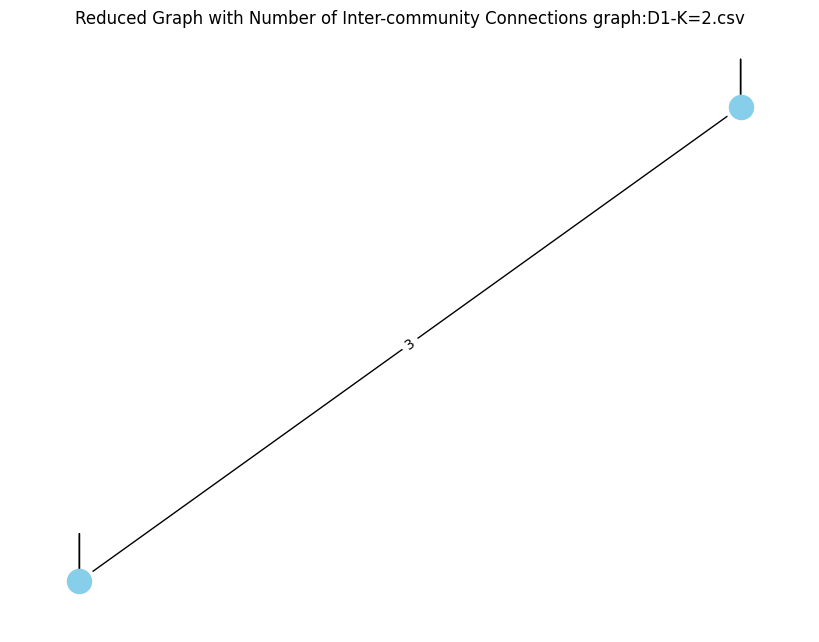

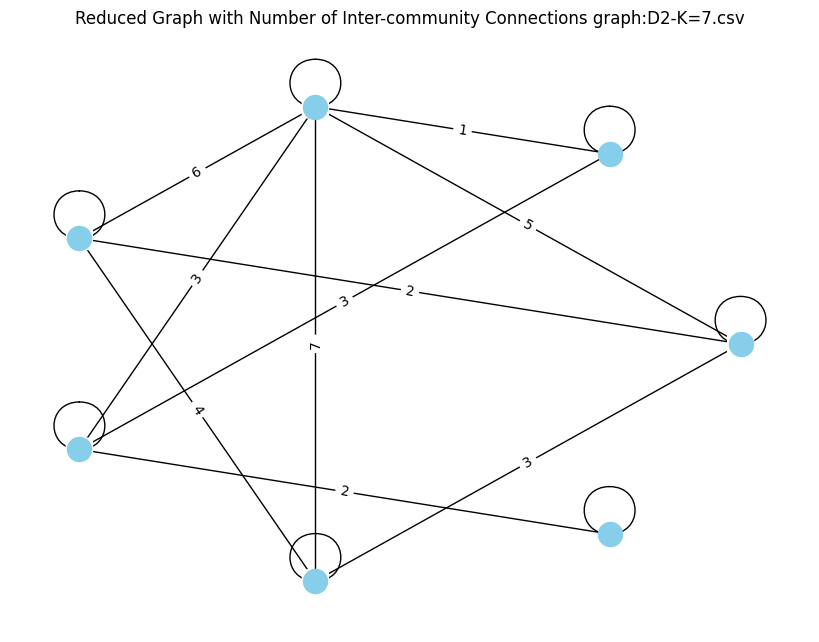

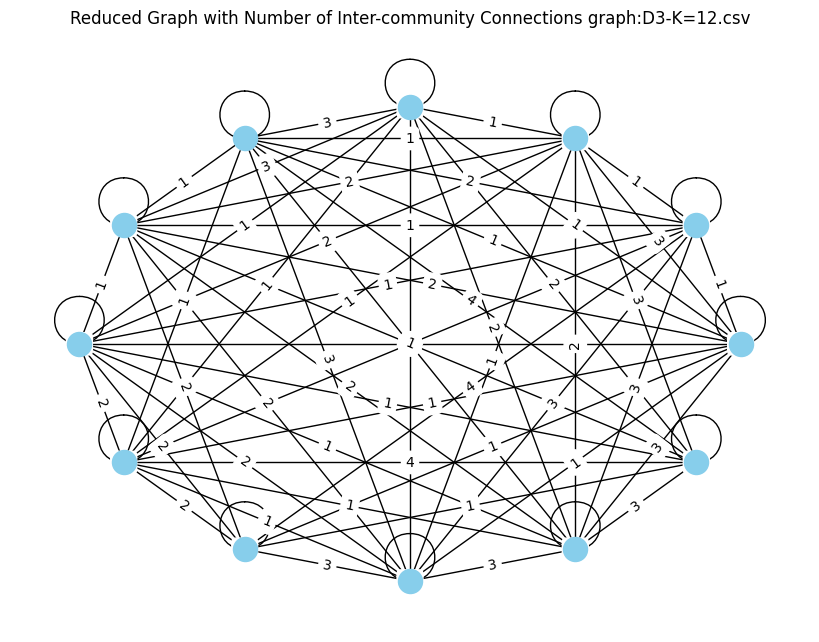

In [41]:
for file_name in file_names_k:
    adj_matrix = graphs_k[file_name]
    noc = number_of_communities[file_name]
    partition = spectral_community_detection(adj_matrix,noc)
    g = nx.from_numpy_array(adj_matrix)

    draw_reduced(g, partition,file_name)

In [29]:
file_name = file_names_k[0]
adj_matrix = graphs_k[file_name]
noc = number_of_communities[file_name]
print(file_name)

D1-K=2.csv


In [30]:
%%timeit 
partition = spectral_community_detection(adj_matrix,noc)


3.73 ms ± 310 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
file_name = file_names_k[1]
adj_matrix = graphs_k[file_name]
noc = number_of_communities[file_name]
print(file_name)

D2-K=7.csv


In [32]:
%%timeit 
partition = spectral_community_detection(adj_matrix,noc)


5.37 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
file_name = file_names_k[2]
adj_matrix = graphs_k[file_name]
noc = number_of_communities[file_name]
print(file_name)

D3-K=12.csv


In [34]:
%%timeit 
partition = spectral_community_detection(adj_matrix,noc)

11.7 ms ± 266 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
import numpy as np

def count_connections(adjacency_matrix, partition):
    """
    This function calculates the number of intra-community and inter-community connections 
    for each node based on the given adjacency matrix and partition.

    Args:
        adjacency_matrix (np.array): A square numpy adjacency matrix representing the graph.
        partition (np.array): A numpy vector where each element indicates the community of the corresponding node.

    Returns:
        intra_connections (dict): A dictionary with node indices as keys and the number of intra-community edges as values.
        inter_connections (dict): A dictionary with node indices as keys and the number of inter-community edges as values.
    """
    
    n = len(partition)  # Number of nodes
    intra_connections = {i: 0 for i in range(n)}  # Initialize intra-community connections
    inter_connections = {i: 0 for i in range(n)}  # Initialize inter-community connections

    # Loop through each pair of nodes to check their connection
    for i in range(n):
        for j in range(i + 1, n):  # Check each pair (i, j) only once
            if adjacency_matrix[i, j] > 0:  # There is an edge between nodes i and j
                # Check if i and j are in the same community or different communities
                if partition[i] == partition[j]:
                    intra_connections[i] += 1
                    intra_connections[j] += 1
                else:
                    inter_connections[i] += 1
                    inter_connections[j] += 1

    return intra_connections, inter_connections


# Get the number of intra-community and inter-community connections
intra_connections, inter_connections = count_connections(adj_matrix, partition)

# Output the results
print("Intra-community connections:", intra_connections)
print("Inter-community connections:", inter_connections)


Intra-community connections: {0: 7, 1: 8, 2: 8, 3: 7, 4: 7, 5: 8, 6: 3, 7: 8, 8: 7, 9: 7, 10: 5, 11: 7, 12: 8, 13: 8, 14: 9, 15: 8, 16: 7, 17: 8, 18: 8, 19: 8, 20: 8, 21: 4, 22: 8, 23: 8, 24: 8, 25: 8, 26: 8, 27: 8, 28: 7, 29: 8, 30: 8, 31: 8, 32: 8, 33: 6, 34: 8, 35: 8, 36: 7, 37: 8, 38: 8, 39: 8, 40: 8, 41: 8, 42: 8, 43: 8, 44: 7, 45: 8, 46: 4, 47: 8, 48: 5, 49: 8, 50: 8, 51: 8, 52: 8, 53: 8, 54: 7, 55: 8, 56: 4, 57: 8, 58: 8, 59: 8, 60: 8, 61: 7, 62: 7, 63: 5, 64: 8, 65: 8, 66: 8, 67: 8, 68: 8, 69: 8, 70: 4, 71: 8, 72: 8, 73: 3, 74: 8, 75: 8, 76: 8, 77: 5, 78: 8, 79: 7, 80: 5, 81: 8, 82: 8, 83: 8, 84: 7, 85: 9, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 4, 94: 7, 95: 5, 96: 7, 97: 8, 98: 7, 99: 8, 100: 8, 101: 8, 102: 8, 103: 2, 104: 8, 105: 9, 106: 7, 107: 7, 108: 7, 109: 8, 110: 8, 111: 9, 112: 8, 113: 7, 114: 8}
Inter-community connections: {0: 4, 1: 4, 2: 2, 3: 4, 4: 3, 5: 2, 6: 6, 7: 3, 8: 5, 9: 4, 10: 4, 11: 5, 12: 3, 13: 2, 14: 1, 15: 3, 16: 4, 17: 2, 18: 3, 19: 3, 

In [36]:
within_community

NameError: name 'within_community' is not defined